# Historisation des statistiques des chaînes de candidats

Analyse des statistiques des chaînes YouTube des candidats entre deux requêtes réalisées par 810

In [1]:
# seul module necessaire
import historique_mod810 as h810
import matplotlib.pyplot as plt
import couleurs_810 as c810
import pandas as pd

folder_candidats = './data_sources/stats_videos/'
videos_historique, chaines_historique  = h810.get_full_histo_data(dossierparent = folder_candidats)
chaines_historique.shape[0]

# Harmoniser les dates. Un jour j'ai lance les reauetes aux alentours de minuit. Certains scripts sont donc date du 08/03, d'autres du 09/03. On ne va prendre que le 08/03
chaines_historique['dateRqt'] = chaines_historique['dateRqt'].replace(['2022/03/09'],'2022/03/08')
# convert column to datetime pandas
chaines_historique['dateRqt'] = pd.to_datetime(chaines_historique['dateRqt'])
chaines_historique =  chaines_historique.sort_values(by = ["dateRqt"], ascending=True)

output_folder = "./data_output/historisation-csv/"

Imported 11 channel data
Imported 12 channel data
Imported 9 channel data
Imported 11 channel data
Imported 9 channel data
Imported 11 channel data
Imported 9 channel data
Probleme avec chaine : Marine Le Pen
Imported 9 channel data
Imported 9 channel data
Imported 9 channel data


In [2]:
chaines_historique.dateRqt.unique()

array(['2021-11-30T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2021-12-06T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-03-08T00:00:00.000000000',
       '2022-03-17T00:00:00.000000000', '2022-03-26T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [3]:
import datetime

# On ne conserve que les mois d'ecart
chaines_historique = chaines_historique[chaines_historique['dateRqt'] != datetime.datetime(2021,11,30,0,0,0)]
chaines_historique = chaines_historique[chaines_historique['dateRqt'] != datetime.datetime(2021,12,1,0,0,0)]
chaines_historique = chaines_historique[chaines_historique['dateRqt'] != datetime.datetime(2022,3,7,0,0,0)]
chaines_historique = chaines_historique[chaines_historique['dateRqt'] != datetime.datetime(2022,3,8,0,0,0)]
chaines_historique = chaines_historique[chaines_historique['dateRqt'] != datetime.datetime(2022,3,17,0,0,0)]

In [4]:
chaines_historique.chaine.unique()

array(['Emmanuel Macron', 'Valérie Pécresse', 'Éric Zemmour',
       'Marine Le Pen', 'Nicolas Dupont-Aignan', 'Jean Lassalle',
       'JEAN-LUC MÉLENCHON', "Avec Yannick Jadot - 2022 L'écologie",
       'Nathalie Arthaud', 'Yannick Jadot 2022', 'Fabien Roussel',
       'Emmanuel Macron avec vous', 'Anne Hidalgo'], dtype=object)

In [5]:
chaines_historique.candidat.unique()

array(['Emmanuel Macron', 'Valérie Pécresse', 'Eric Zemmour',
       'Marine Le Pen', 'Nicolas Dupont-Aignan', 'Jean Lassalle',
       'Jean-Luc Mélenchon', 'Yannick Jadot', 'Nathalie Arthaud',
       'Fabien Roussel', 'Avec vous', 'Anne Hidalgo'], dtype=object)

In [6]:
chaines_historique.head(1)

,dateRqt,candidat,parti,courant,chaine,dateCreationChaine,pays,categorieschaine,vuesChaine,abonnesChaine,nbVideosChaine
63,2021-12-06,Emmanuel Macron,LREM,centre,Emmanuel Macron,2017-10-03,FR,"[https://en.wikipedia.org/wiki/Society, https:...",16062559,231000,328


# Script specifique

In [7]:
candidat = "Yannick Jadot"
couleur_candidat = "#62D8A0"


nom_dossier = candidat.split(" ")[1]
print("Nom dossier : "+nom_dossier)


chaine_candidat_histo = chaines_historique[chaines_historique['candidat'] == candidat]
chaine_candidat_histo =  chaine_candidat_histo.sort_values(by = ["dateRqt"], ascending=True)


Nom dossier : Jadot


- croissance des abo
- croissance relative
- nombre de vues de la chaines
- nombre de videos par mois
- nombre de vues par mois
- Les tops tags par mois
- les tops mots par mois

Tout exporter en CSV.

Croissance abo entre Janvier 2022 et Mars 2022 : En Volume et en taux pour un visuel




# Evolution du nombre d'abonnes

In [8]:
mes_colonnes = ["dateRqt", "abonnesChaine"]
base_name = "evo_abo_chaine"

<AxesSubplot:title={'center':'evo_abo_chaine Yannick Jadot'}, xlabel='dateRqt'>

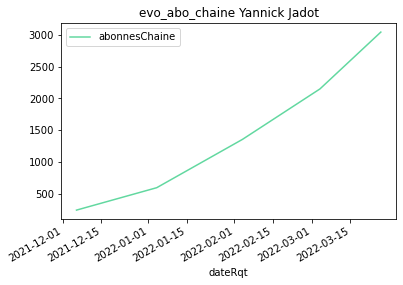

In [9]:
chaine_candidat_histo.plot(x = mes_colonnes[0], y = mes_colonnes[1], color = couleur_candidat, title = base_name + " " + candidat)

In [10]:
csv_a_dumper_ini = chaine_candidat_histo[mes_colonnes]
csv_a_dumper_ini.to_csv(output_folder+base_name+"_"+candidat+".csv")

# Evolution du nombre de vues de la chaine

<AxesSubplot:title={'center':'evo_vues_chaine Yannick Jadot'}, xlabel='dateRqt'>

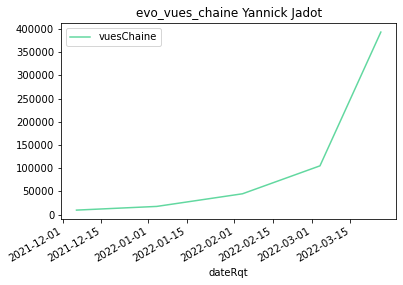

In [11]:
mes_colonnes = ["dateRqt", "vuesChaine"]
base_name = "evo_vues_chaine"

chaine_candidat_histo.plot(x = mes_colonnes[0], y = mes_colonnes[1], color = couleur_candidat, title = base_name + " " + candidat)

In [12]:
csv_a_dumper_ini = chaine_candidat_histo[mes_colonnes]
csv_a_dumper_ini.to_csv(output_folder+base_name+"_"+candidat+".csv")

## Evolution du nombre de video de la chaine

<AxesSubplot:title={'center':'evo_nbvideos_chaine Yannick Jadot'}, xlabel='dateRqt'>

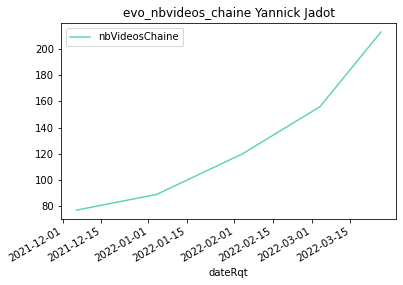

In [13]:
mes_colonnes = ["dateRqt", "nbVideosChaine"]
base_name = "evo_nbvideos_chaine"

chaine_candidat_histo.plot(x = mes_colonnes[0], y = mes_colonnes[1], color = couleur_candidat, title = base_name + " " + candidat)

TODO : Get gradient => 

In [14]:
listedates = []
chaines_historique = chaines_historique.sort_values(by=['dateRqt'], ascending=True)
listedates = chaines_historique.dateRqt.unique()
listedates

array(['2021-12-06T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
def creer_dtf_evo_multidate (dtfsource) :
    dtf_evo_globale = pd.DataFrame()
    index = 0
    dtf_evo_globale = h810.make_dtf_evo_global(dtfchaineshisto=dtfsource, datedebut= listedates[index], datefin= listedates[index])
    while (index < len(listedates)-1) :
        dtf_evo = h810.make_dtf_evo_global(dtfchaineshisto=dtfsource, datedebut= listedates[index], datefin= listedates[index+1])
        index += 1
        dtf_evo_globale = dtf_evo_globale.append(dtf_evo)

    return dtf_evo_globale

dtf_evo_globale = creer_dtf_evo_multidate(chaines_historique)
    
test_jadot = dtf_evo_globale[dtf_evo_globale['candidat'] == "Yannick Jadot"]

dtf_evo_globale.to_csv('poubelle.csv')

test_jadot.head(10)

,dateRqt,candidat,courant,nbabo_intial,nbabo_final,nbabo_delta,nbabo_taux,nbvues_intial,nbvues_final,nbvues_delta,nbvues_taux,nbvideos_intial,nbvideos_final,nbvideos_delta,nbvideos_taux
7,2021-12-06,Yannick Jadot,vert,252,252,0,0.000000,9657,9657,0,0.000000,77,77,0,0.000000
7,2022-01-04,Yannick Jadot,vert,252,603,351,1.392857,9657,17618,7961,0.824376,77,89,12,0.155844
7,2022-02-04,Yannick Jadot,vert,603,1360,757,1.255390,17618,44876,27258,1.547168,89,120,31,0.348315
7,2022-03-04,Yannick Jadot,vert,1360,2150,790,0.580882,44876,105122,60246,1.342499,120,156,36,0.300000
7,2022-03-26,Yannick Jadot,vert,2150,3040,890,0.413953,105122,393510,288388,2.743365,156,213,57,0.365385


- Creer un tableau ou le max des abonnes pour un candidat vaut 1.
- Les autres mois sont un taux d'abonnes par rapport a cette totalite, on aura une bonne idee des tendances de croissance

<AxesSubplot:xlabel='dateRqt'>

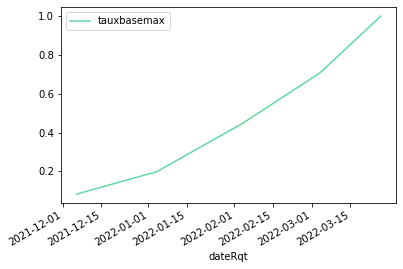

In [16]:
max_abo_jadot = test_jadot.nbabo_final.max()

liste_new_taux = []
for index, row in test_jadot.iterrows():
    candidat = row['candidat']
    dater = row['dateRqt']
    nbabo = row['nbabo_final']
    tauxabo = row['nbabo_final']/max_abo_jadot
    liste_new_taux.append([dater, candidat, nbabo, tauxabo])

df_evo = pd.DataFrame(liste_new_taux, columns=['dateRqt', "candidat", "nbabo_mois", "tauxbasemax"])


df_evo.plot(x = "dateRqt", y = "tauxbasemax", color = couleur_candidat, title = '')

In [17]:
df_evo.head(10)

,dateRqt,candidat,nbabo_mois,tauxbasemax
0,2021-12-06,Yannick Jadot,252,0.082895
1,2022-01-04,Yannick Jadot,603,0.198355
2,2022-02-04,Yannick Jadot,1360,0.447368
3,2022-03-04,Yannick Jadot,2150,0.707237
4,2022-03-26,Yannick Jadot,3040,1.000000


- Faire une courbe par candidat



In [18]:
def get_taux_par_rapport_au_max(subdtf, indicateur = "nbabo_final") :
    dtf_output = pd.DataFrame()
    dtf_output['dateRqt'] = subdtf['dateRqt'].unique()
    for candidat in subdtf.candidat.unique() :
        dtf_candidat = subdtf[subdtf['candidat'] == candidat]
        max_indicateur = dtf_candidat[indicateur].max()

        liste_new_taux = []
        for index, row in dtf_candidat.iterrows():
            candidat = row['candidat']
            dater = row['dateRqt']
            if max_indicateur != 0 :
                tauxmax = row[indicateur]/max_indicateur
            else :
                tauxmax = 0
            liste_new_taux.append(tauxmax)

        dtf_output[candidat] = liste_new_taux
    
    return dtf_output

dtf_taux_evo_abo = get_taux_par_rapport_au_max(subdtf=dtf_evo_globale, indicateur = "nbabo_final")
dtf_taux_evo_abo.to_csv(output_folder+"evo_taux_abo_par_candidat.csv")
dtf_taux_evo_vues = get_taux_par_rapport_au_max(subdtf=dtf_evo_globale, indicateur = "nbvues_final")
dtf_taux_evo_vues.to_csv(output_folder+"evo_taux_vues_par_candidat.csv")
dtf_taux_evo_nbvideos = get_taux_par_rapport_au_max(subdtf=dtf_evo_globale, indicateur = "nbvideos_final")
dtf_taux_evo_nbvideos.to_csv(output_folder+"evo_taux_videos_par_candidat.csv")